# Note

This code is for demonstration of gradient descent methods in `Python`. Please contact Luca Steyn to report any errors. The following examples are shown:

 - Gradient Descent
 - Backtracking Line Search
 - Momentum and Nesterov's Accelerated Gradient

# Import and Data

The code depends only on `numpy`. We generate some basic regression data. 

In [1]:
import numpy as np # dependency
import matplotlib.pyplot as plt
import seaborn as sns

# Generate data
np.random.seed(42) # Seed for reproducibility
n, p = 100, 10  # Number of observations and features

X = np.random.randn(n, p)
true_beta = np.random.randn(p)
y = X @ true_beta + 0.5 * np.random.randn(n)  # Adding some noise

### Class note

Matrix multiplication in `Python` can be done a few ways. 

In [2]:
A = np.array([[1,2],[3,4]])
A

array([[1, 2],
       [3, 4]])

In [3]:
b_flat = np.array([-1,-2])
b_flat

array([-1, -2])

In [4]:
b = np.reshape(b_flat, (2,1))
b

array([[-1],
       [-2]])

In [5]:
np.matmul(A, b)

array([[ -5],
       [-11]])

In [6]:
A @ b

array([[ -5],
       [-11]])

In [7]:
np.dot(A,b)

array([[ -5],
       [-11]])

In [8]:
A.dot(b)

array([[ -5],
       [-11]])

In [9]:
np.dot(A, b_flat)

array([ -5, -11])

In [10]:
np.matmul(A, b_flat)

array([ -5, -11])

In [11]:
np.dot(b_flat,A)

array([ -7, -10])

In [12]:
np.matmul(b_flat,A)

array([ -7, -10])

In [13]:
np.matmul(b.T, A)

array([[ -7, -10]])

In [14]:
# Uncomment for error
#np.matmul(b,A)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)

In [15]:
# Uncomment for error
#b.dot(A)

ValueError: shapes (2,1) and (2,2) not aligned: 1 (dim 1) != 2 (dim 0)

# Back to Gradient Descent

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [18]:
# Print the estimated coefficients
print("Estimated coefficients:", model.coef_)
print("True coefficients:", true_beta)

Estimated coefficients: [ 1.39587207  0.91518963  0.0322017  -0.63599035  0.71822196  0.34651249
  0.87507172  0.74584492  1.1619711  -0.52638455]
True coefficients: [ 1.39935544  0.92463368  0.05963037 -0.64693678  0.69822331  0.39348539
  0.89519322  0.6351718   1.04955272 -0.53523521]


## General function for gradient descent

Note one must specify the `cost_function` which is the loss taking the arguments `X`, `y`, `beta` and the `gradient_function` of the loss which takes the same inputs. Note we also raise a warning if the algorithm did not converge.

In [19]:
import warnings

In [20]:
def gradient_descent(X, y, beta, learning_rate, num_iterations, 
                     cost_function, gradient_function, tol=1e-4, print_every=250):
    """
    Perform gradient descent to learn beta.
    """
    beta = beta.reshape(-1, 1)
    y = y.reshape(-1, 1)
    if len(X.shape) == 1:
        X = X.reshape(-1, 1)  # Univariate case
    
    cost_history = np.zeros(num_iterations)
    for i in range(num_iterations):
        gradient = gradient_function(X, y, beta)
        beta -= learning_rate * gradient
        cost_history[i] = cost_function(X, y, beta)
        
        if (i + 1) % print_every == 0:
            print(f"Iteration {i + 1}: Cost {cost_history[i]}")
        
        if np.linalg.norm(gradient) <= tol:
            print(f"Converged after {i + 1} iterations")
            break

        if (i+1) == num_iterations:
            warnings.warn('Algorithm did not converge. Returning estimates of last update.')
    
    return beta, cost_history

In [21]:
def mse_cost(X, y, beta):
    m = len(y)
    predictions = np.matmul(X, beta)
    cost = (1 / (2 * m)) * np.sum((y - predictions) ** 2)
    return cost

def mse_cost_gradient(X, y, beta):
    m = len(y)
    predictions = np.matmul(X, beta)
    errors = predictions - y # Note we use -(y - pred)
    gradient = (1 / m) * np.matmul(np.transpose(X), errors)
    return gradient

In [22]:
# Initialize parameters
beta_initial = np.zeros(p)
learning_rate = 0.01
num_iterations = 10000

# Run gradient descent
beta_estimated, risk_history = gradient_descent(X, y, beta_initial, learning_rate, num_iterations, mse_cost, mse_cost_gradient)

# Print the estimated coefficients
print("Estimated coefficients:", beta_estimated.ravel())
print("True coefficients:", true_beta)

Iteration 250: Cost 0.1721806178934627
Iteration 500: Cost 0.1229964329735012
Iteration 750: Cost 0.12036828288933203
Iteration 1000: Cost 0.12014229615890026
Iteration 1250: Cost 0.12012086711191593
Iteration 1500: Cost 0.12011879656138576
Iteration 1750: Cost 0.12011859559738852
Converged after 1827 iterations
Estimated coefficients: [ 1.39664222  0.9149697   0.02903372 -0.63043954  0.72167753  0.34451824
  0.87180299  0.74807292  1.16158547 -0.52495546]
True coefficients: [ 1.39935544  0.92463368  0.05963037 -0.64693678  0.69822331  0.39348539
  0.89519322  0.6351718   1.04955272 -0.53523521]


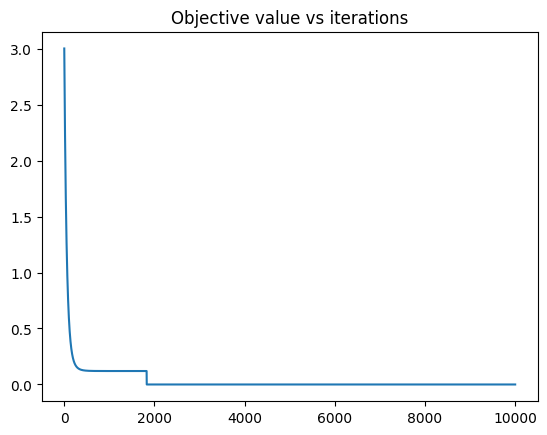

In [23]:
plt.figure()
plt.plot(risk_history)
plt.title('Objective value vs iterations')
plt.show()

In [24]:
# Initialize parameters
beta_initial = np.zeros(p)
learning_rate = 0.01
num_iterations = 10

# Run gradient descent
beta_estimated, risk_history = gradient_descent(X, y, beta_initial, learning_rate, num_iterations, mse_cost, mse_cost_gradient)

# Print the estimated coefficients
print("Estimated coefficients:", beta_estimated.ravel())
print("True coefficients:", true_beta)

Estimated coefficients: [ 0.11823692  0.06752804  0.00690688 -0.04730604  0.08318312  0.02715378
  0.04470774  0.06896657  0.08856433 -0.08248365]
True coefficients: [ 1.39935544  0.92463368  0.05963037 -0.64693678  0.69822331  0.39348539
  0.89519322  0.6351718   1.04955272 -0.53523521]


C:\Users\lucas\AppData\Local\Temp\ipykernel_28356\560478713.py:25: UserWarning: Algorithm did not converge. Returning estimates of last update.
  warnings.warn('Algorithm did not converge. Returning estimates of last update.')


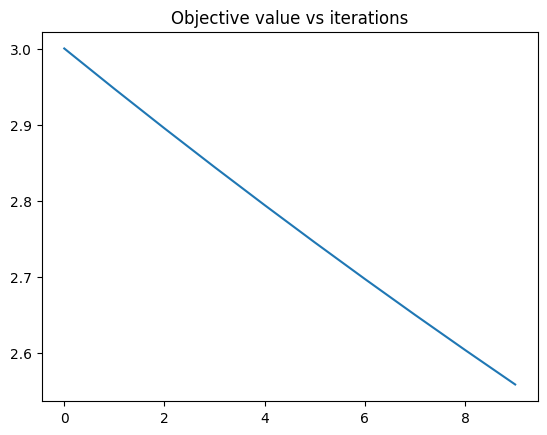

In [25]:
plt.figure()
plt.plot(risk_history)
plt.title('Objective value vs iterations')
plt.show()

## Gradient descent with backtracking line search

In [26]:
def backtracking_line_search(X, y, beta, gradient, cost_function, initial_step_size=1.0, alpha_1=0.8, alpha_2=0.5):
    """
    Perform backtracking line search to find the optimal step size.
    """
    t = initial_step_size
    cost = cost_function(X, y, beta)
    
    while cost_function(X, y, beta - t * gradient) > cost - alpha_2 * t * np.dot(gradient.T, gradient):
        t *= alpha_1
    
    return t

def gradient_descent_with_backtracking(X, y, beta, cost_function, gradient_function, 
                                       initial_step_size=1.0, alpha_1=0.8, alpha_2=0.5, 
                                       num_iterations=10000, tol=1e-4, print_every=100):
    """
    Perform gradient descent with backtracking line search to learn beta.
    """
    beta = beta.reshape(-1, 1)
    y = y.reshape(-1, 1)
    if len(X.shape) == 1:
        X = X.reshape(-1, 1)  # Univariate case
    
    cost_history = np.zeros(num_iterations)
    
    for i in range(num_iterations):
        gradient = gradient_function(X, y, beta)
        
        # Perform backtracking line search to find the step size
        step_size = backtracking_line_search(X, y, beta, gradient, cost_function, initial_step_size, alpha_1, alpha_2)
        
        beta -= step_size * gradient
        cost_history[i] = cost_function(X, y, beta)
        
        if (i + 1) % print_every == 0:
            print(f"Iteration {i + 1}: Cost {cost_history[i]}")
        
        if np.linalg.norm(gradient) <= tol:
            print(f"Converged after {i + 1} iterations")
            break
        
        if (i+1) == num_iterations:
            warnings.warn('Algorithm did not converge. Returning estimates of last update.')
    
    return beta, cost_history

In [27]:
# Initialize parameters
beta_initial = np.zeros(p)
num_iterations = 10000

# Run gradient descent
beta_estimated, risk_history = gradient_descent_with_backtracking(
    X,
    y,
    beta_initial,
    mse_cost,
    mse_cost_gradient,
    initial_step_size=1.0,
    alpha_1=0.8,
    alpha_2=0.5,
    num_iterations=num_iterations,
    tol=0.0001,
    print_every=100,
)

# Print the estimated coefficients
print("Estimated coefficients:", beta_estimated.ravel())
print("True coefficients:", true_beta)

Converged after 16 iterations
Estimated coefficients: [ 1.39664763  0.91503196  0.02902351 -0.63048945  0.72165902  0.34456106
  0.87185982  0.74803012  1.16166052 -0.52488151]
True coefficients: [ 1.39935544  0.92463368  0.05963037 -0.64693678  0.69822331  0.39348539
  0.89519322  0.6351718   1.04955272 -0.53523521]


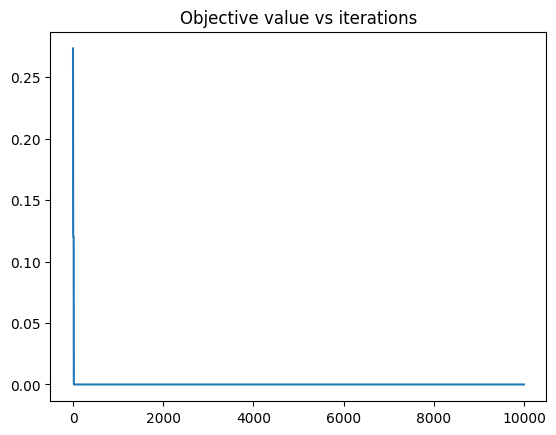

In [28]:
plt.figure()
plt.plot(risk_history)
plt.title('Objective value vs iterations')
plt.show()

In [29]:
# Initialize parameters
beta_initial = np.zeros(p)
num_iterations = 3

# Run gradient descent
beta_estimated, risk_history = gradient_descent_with_backtracking(
    X,
    y,
    beta_initial,
    mse_cost,
    mse_cost_gradient,
    initial_step_size=1.0,
    alpha_1=0.8,
    alpha_2=0.5,
    num_iterations=num_iterations,
    tol=0.0001,
    print_every=100,
)

# Print the estimated coefficients
print("Estimated coefficients:", beta_estimated.ravel())
print("True coefficients:", true_beta)

Estimated coefficients: [ 1.36950279  0.83824974  0.04893488 -0.57642731  0.74366155  0.29608519
  0.78968983  0.79234756  1.07522231 -0.62131614]
True coefficients: [ 1.39935544  0.92463368  0.05963037 -0.64693678  0.69822331  0.39348539
  0.89519322  0.6351718   1.04955272 -0.53523521]


C:\Users\lucas\AppData\Local\Temp\ipykernel_28356\4104379335.py:43: UserWarning: Algorithm did not converge. Returning estimates of last update.
  warnings.warn('Algorithm did not converge. Returning estimates of last update.')


Not bad for three iterations...

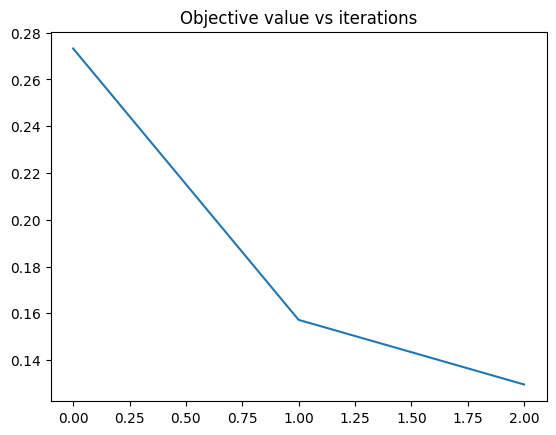

In [30]:
plt.figure()
plt.plot(risk_history)
plt.title('Objective value vs iterations')
plt.show()

## Adding momentum

**Note**: Backtracking and momentum are not generally performed together. The code below only uses momentum and the backtracking step has been removed. Why shouldn't momentum and backtracking be combined? Backtracking performs a step to find an appropriate step size, whereas momentum adjusts the updates based on the previous ones. So the backtracking is redundant to some extent and adds additional computational complexity.

In [31]:
def gradient_descent_with_momentum(X, y, beta, cost_function, gradient_function, 
                                   momentum=0.9, nesterov=False, learning_rate=0.01,
                                   num_iterations=10000, 
                                   tol=1e-4, print_every=100):
    """
    Perform gradient descent with backtracking line search and momentum.
    """
    beta = beta.reshape(-1, 1)
    y = y.reshape(-1, 1)
    if len(X.shape) == 1:
        X = X.reshape(-1, 1)  # Univariate case
    
    cost_history = np.zeros(num_iterations)
    velocity = np.zeros_like(beta)
    
    for i in range(num_iterations):
        if nesterov:
            lookahead_beta = beta + momentum * velocity
            gradient = gradient_function(X, y, lookahead_beta)
        else:
            gradient = gradient_function(X, y, beta)
        
        # Update velocity and beta
        velocity = momentum * velocity - learning_rate * gradient
        beta += velocity
        
        cost_history[i] = cost_function(X, y, beta)
        
        if (i + 1) % print_every == 0:
            print(f"Iteration {i + 1}: Cost {cost_history[i]}")
        
        if np.linalg.norm(gradient) <= tol:
            print(f"Converged after {i + 1} iterations")
            break
        
        if (i+1) == num_iterations:
            warnings.warn('Algorithm did not converge. Returning estimates of last update.')
    
    return beta, cost_history

In [32]:
# Initialize parameters
beta_initial = np.zeros(p)
num_iterations = 10000

# Run gradient descent
beta_estimated, risk_history = gradient_descent_with_momentum(
    X,
    y,
    beta_initial,
    mse_cost,
    mse_cost_gradient,
    momentum=0.9,
    nesterov=False,
    learning_rate=0.1,
    num_iterations=10000,
    tol=0.0001,
    print_every=50,
)

# Print the estimated coefficients
print("Estimated coefficients:", beta_estimated.ravel())
print("True coefficients:", true_beta)

Iteration 50: Cost 0.12455204441275304
Iteration 100: Cost 0.12014415818852621
Iteration 150: Cost 0.12011885753945156
Converged after 184 iterations
Estimated coefficients: [ 1.39667076  0.91511104  0.02900828 -0.63048637  0.72164151  0.34457279
  0.87189899  0.74808663  1.16170588 -0.52485113]
True coefficients: [ 1.39935544  0.92463368  0.05963037 -0.64693678  0.69822331  0.39348539
  0.89519322  0.6351718   1.04955272 -0.53523521]


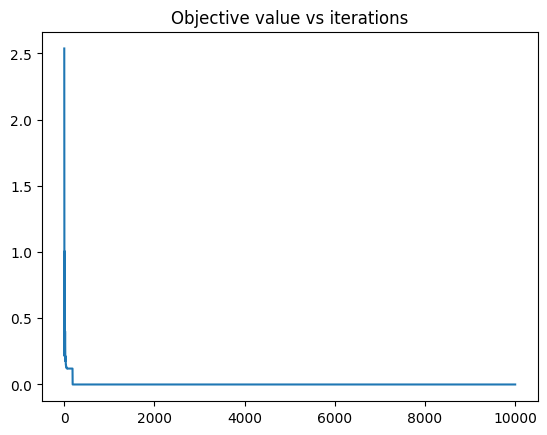

In [33]:
plt.figure()
plt.plot(risk_history)
plt.title('Objective value vs iterations')
plt.show()

In [34]:
# Initialize parameters
beta_initial = np.zeros(p)
num_iterations = 10000

# Run gradient descent
beta_estimated, risk_history = gradient_descent_with_momentum(
    X,
    y,
    beta_initial,
    mse_cost,
    mse_cost_gradient,
    momentum=0.9,
    nesterov=True,
    learning_rate=0.1,
    num_iterations=10000,
    tol=0.0001,
    print_every=50,
)

# Print the estimated coefficients
print("Estimated coefficients:", beta_estimated.ravel())
print("True coefficients:", true_beta)

Iteration 50: Cost 0.1202013439508539
Iteration 100: Cost 0.12011859081239669
Converged after 110 iterations
Estimated coefficients: [ 1.39663755  0.91512034  0.02901418 -0.63056388  0.72164947  0.34461497
  0.87190269  0.74794168  1.16174059 -0.52480013]
True coefficients: [ 1.39935544  0.92463368  0.05963037 -0.64693678  0.69822331  0.39348539
  0.89519322  0.6351718   1.04955272 -0.53523521]


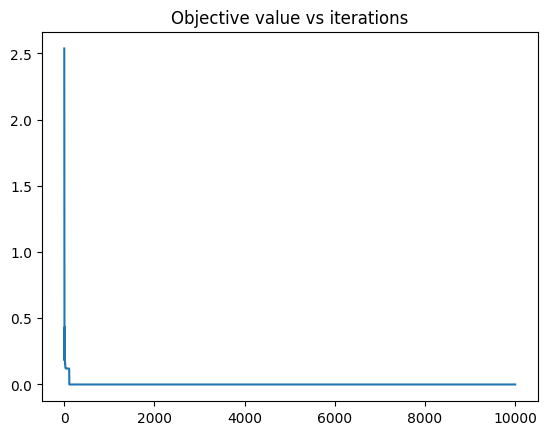

In [35]:
plt.figure()
plt.plot(risk_history)
plt.title('Objective value vs iterations')
plt.show()

In [36]:
# Initialize parameters
beta_initial = np.zeros(p)
num_iterations = 10000

# Run gradient descent
beta_estimated, risk_history = gradient_descent_with_momentum(
    X,
    y,
    beta_initial,
    mse_cost,
    mse_cost_gradient,
    momentum=0.9,
    nesterov=True,
    learning_rate=0.05,
    num_iterations=10000,
    tol=0.0001,
    print_every=50,
)

# Print the estimated coefficients
print("Estimated coefficients:", beta_estimated.ravel())
print("True coefficients:", true_beta)

Iteration 50: Cost 0.12119668328442482
Iteration 100: Cost 0.12011898584945577
Converged after 135 iterations
Estimated coefficients: [ 1.39665968  0.91497489  0.02902873 -0.63045579  0.72167738  0.34450927
  0.87183019  0.74803242  1.16157208 -0.52493435]
True coefficients: [ 1.39935544  0.92463368  0.05963037 -0.64693678  0.69822331  0.39348539
  0.89519322  0.6351718   1.04955272 -0.53523521]


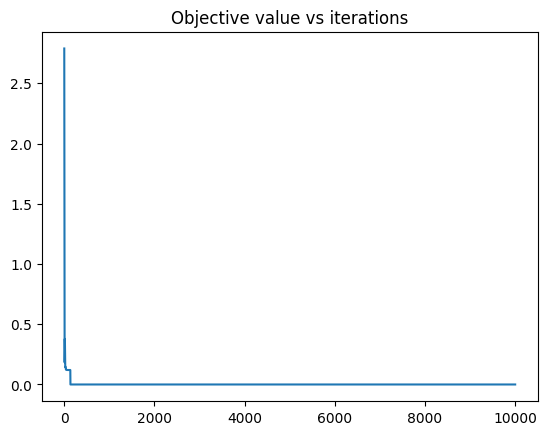

In [37]:
plt.figure()
plt.plot(risk_history)
plt.title('Objective value vs iterations')
plt.show()

# Difficult objective where momentum works better

In [38]:
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def f(x, y, a=30, b=3):
    return a * x**4 + b * y**4

# Define the gradient of the function
def grad_f(x, y, a=10, b=2):
    df_dx = 4 * a * x**3
    df_dy = 4 * b * y**3
    return np.array([[df_dx], [df_dy]])

# Generate data for plotting
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Zgrad = grad_f(X, Y)

In [39]:
Z.shape

(100, 100)

In [40]:
Zgrad.shape

(2, 1, 100, 100)

In [41]:
Zgrad.squeeze().shape

(2, 100, 100)

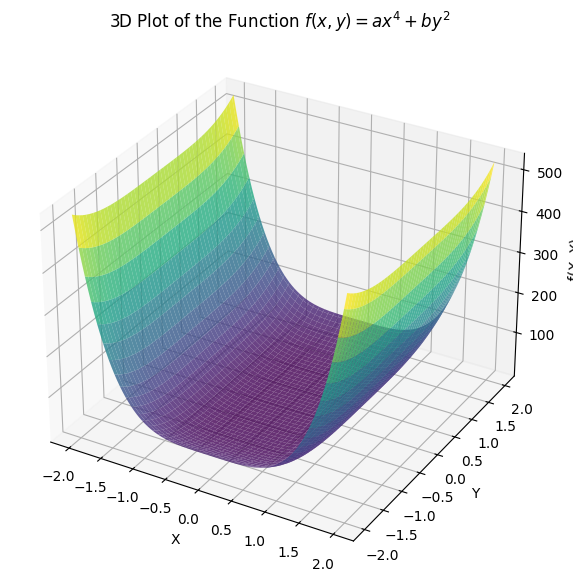

In [42]:
# Create the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# Set labels
ax.set_title('3D Plot of the Function $f(x, y) = ax^4 + by^2$')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')

plt.show()

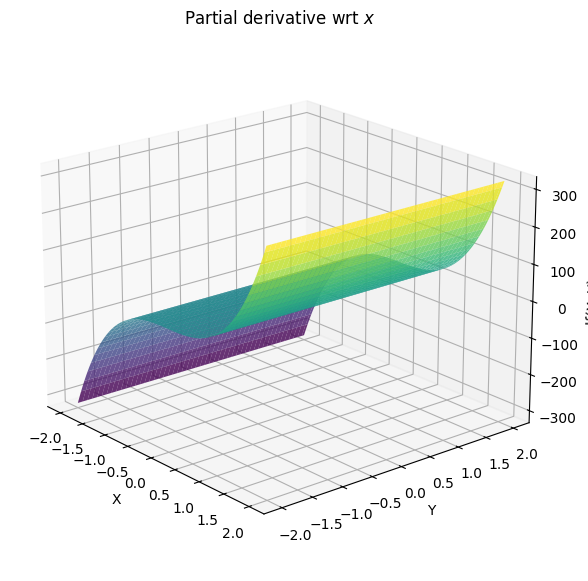

In [43]:
# Create the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Zgrad.squeeze()[0], cmap='viridis', alpha=0.8)

# Set labels
ax.set_title('Partial derivative wrt $x$')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('df(X, Y)')

ax.view_init(20,-40)

plt.show()

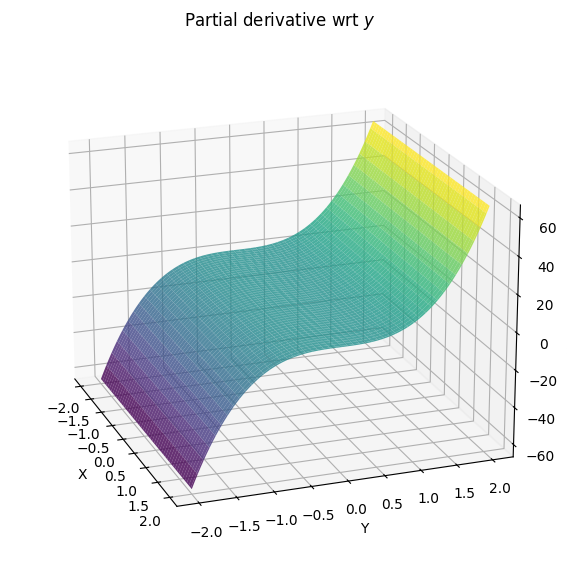

In [44]:
# Create the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Zgrad.squeeze()[1], cmap='viridis', alpha=0.8)

# Set labels
ax.set_title('Partial derivative wrt $y$')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('df(X, Y)')

ax.view_init(20,-20)
plt.show()

In [45]:
def grad_descent_with_momentum(pars_init, f, df, a=10, b=2, momentum=0.9, nesterov=False, learning_rate=0.01,
                               num_iterations=10000, tol=1e-4, print_every=100):
    pars = np.reshape(pars_init, (-1,1))
    velocity = np.zeros_like(pars)
    fx_history = []
    for i in range(num_iterations):
        x = pars[0,0]
        y = pars[1,0]
        if nesterov:
            lookahead_ = pars + momentum * velocity
            lx = lookahead_[0,0]
            ly = lookahead_[1,0]
            gradient = df(lx, ly, a, b)
        else:
            gradient = df(x, y, a, b)
        
        # Update velocity and beta
        velocity = momentum * velocity - learning_rate * gradient
        pars += velocity

        fx_history.append(f(pars[0,0],pars[1,0], a, b))

        if (i+1) % print_every == 0:
            print(f'Iteration: {i+1}, pars: ({pars[0,0]}, {pars[1,0]}), f(x,y): {f(pars[0,0],pars[1,0], a, b)}.')
            print(np.linalg.norm(gradient))
        
        if np.linalg.norm(gradient) <= tol:
            print(f"Converged after {i + 1} iterations")
            break
        
        if (i+1) == num_iterations:
            warnings.warn('Algorithm did not converge. Returning estimates of last update.')
    
    return pars, fx_history

In [46]:
pars_opt = [0., 0.]
f(pars_opt[0],pars_opt[1])

0.0

In [47]:
pars_init = [1., 1.]

In [48]:
pars_est, f_history = grad_descent_with_momentum(
    pars_init, 
    f, 
    grad_f, 
    momentum=0., 
    nesterov=False, 
    learning_rate=0.01,
    num_iterations=10000, 
    tol=1e-4, 
    print_every=500
)

Iteration: 500, pars: (0.049687135928371845, 0.1107447511104102), f(x,y): 0.00036178131081902344.
0.0119575325456811
Iteration: 1000, pars: (0.03523517418121241, 0.07865998322265273), f(x,y): 9.198132031511123e-05.
0.004275072266280302
Iteration: 1500, pars: (0.02879910067463096, 0.06432667414037813), f(x,y): 4.112362836064708e-05.
0.002336268624357371
Iteration: 2000, pars: (0.024954188577472156, 0.055753661959421476), f(x,y): 2.320287816658791e-05.
0.0015205579741831205
Iteration: 2500, pars: (0.02232713873425975, 0.04989233306326638), f(x,y): 1.4877714036255456e-05.
0.001089391678140257
Iteration: 3000, pars: (0.020386427062082504, 0.04556056641748701), f(x,y): 1.034488929972143e-05.
0.0008294364299535441
Iteration: 3500, pars: (0.018877284943568995, 0.04219114488303469), f(x,y): 7.607326760311768e-06.
0.000658615439064633
Iteration: 4000, pars: (0.01766030763880372, 0.03947347822218895), f(x,y): 5.828428694240203e-06.
0.0005393222097878927
Iteration: 4500, pars: (0.0166519512117009

C:\Users\lucas\AppData\Local\Temp\ipykernel_28356\1276685049.py:32: UserWarning: Algorithm did not converge. Returning estimates of last update.
  warnings.warn('Algorithm did not converge. Returning estimates of last update.')


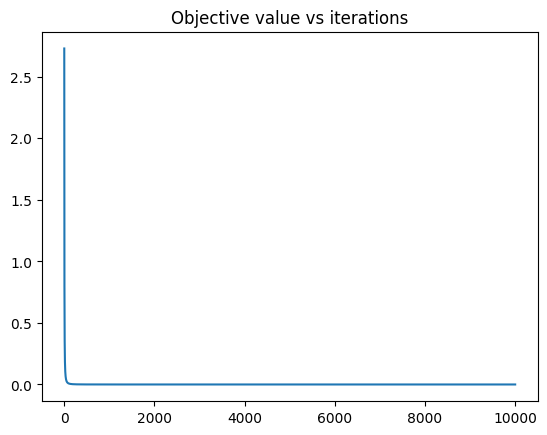

In [49]:
plt.figure()
plt.plot(f_history)
plt.title('Objective value vs iterations')
plt.show()

In [50]:
pars_est, f_history = grad_descent_with_momentum(
    pars_init, 
    f, 
    grad_f, 
    momentum=0.9, 
    nesterov=False, 
    learning_rate=0.01,
    num_iterations=10000, 
    tol=1e-4, 
    print_every=500
)

Iteration: 500, pars: (-0.016028426694398, 0.03496198977675669), f(x,y): 3.64826357265823e-06.
0.00038065494544166286
Iteration: 1000, pars: (-0.011196223984620914, 0.024735081185188718), f(x,y): 9.057976464327191e-07.
0.00013365117506412052
Converged after 1214 iterations


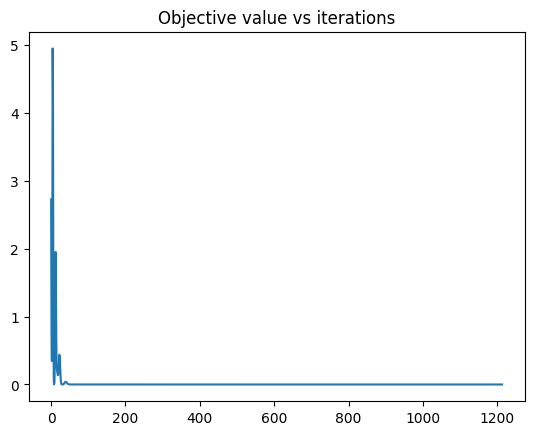

In [51]:
plt.figure()
plt.plot(f_history)
plt.title('Objective value vs iterations')
plt.show()

In [52]:
f(pars_est[0,0],pars_est[1,0])

1.0822311061638216e-06

In [53]:
np.round(f(pars_est[0,0],pars_est[1,0]), 4)

0.0

In [54]:
pars_est, f_history = grad_descent_with_momentum(
    pars_init, 
    f, 
    grad_f, 
    momentum=0.9, 
    nesterov=True, 
    learning_rate=0.01,
    num_iterations=10000, 
    tol=1e-4, 
    print_every=500
)

Iteration: 500, pars: (-0.014754113865967092, -0.023621094267239982), f(x,y): 1.0964927050885536e-06.
0.0001662310872034068
Converged after 801 iterations


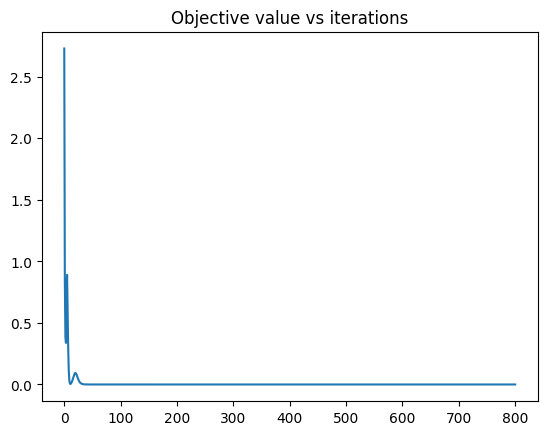

In [55]:
plt.figure()
plt.plot(f_history)
plt.title('Objective value vs iterations')
plt.show()

# Even worse scenario

Note we make `a` big and keep `b` small. So there is massive curvature in the direction of $x$ and very flat curve in the direction of $y$. 

In [56]:
# Generate data for plotting
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

Z = f(X, Y, a=100, b=4)

Zgrad = grad_f(X, Y, a=100, b=4)

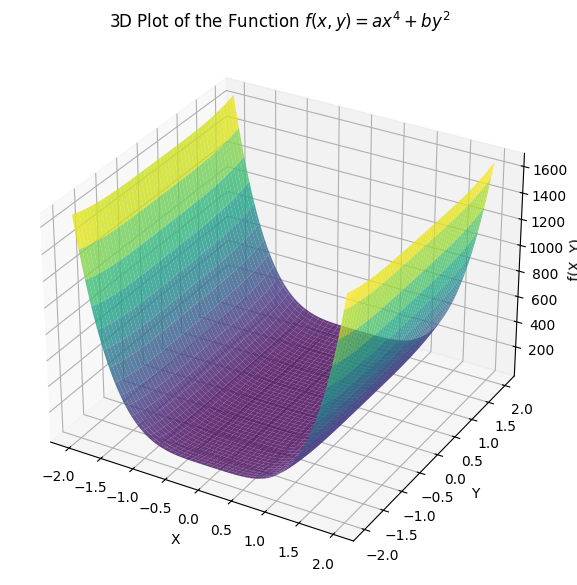

In [57]:
# Create the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# Set labels
ax.set_title('3D Plot of the Function $f(x, y) = ax^4 + by^2$')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')

plt.show()

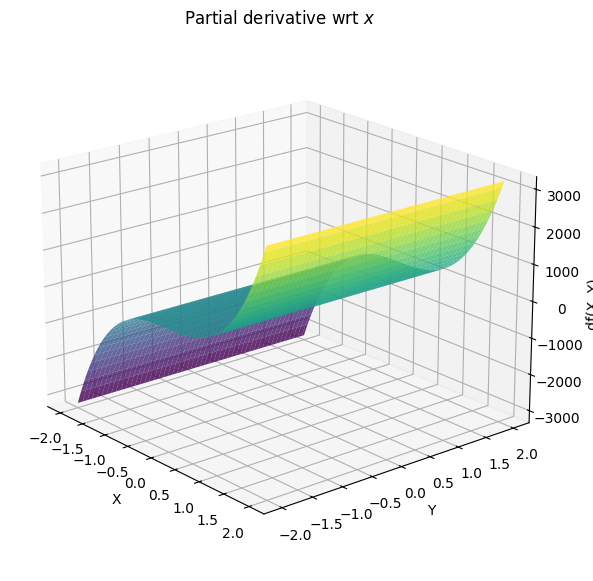

In [58]:
# Create the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Zgrad.squeeze()[0], cmap='viridis', alpha=0.8)

# Set labels
ax.set_title('Partial derivative wrt $x$')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('df(X, Y)')

ax.view_init(20,-40)

plt.show()

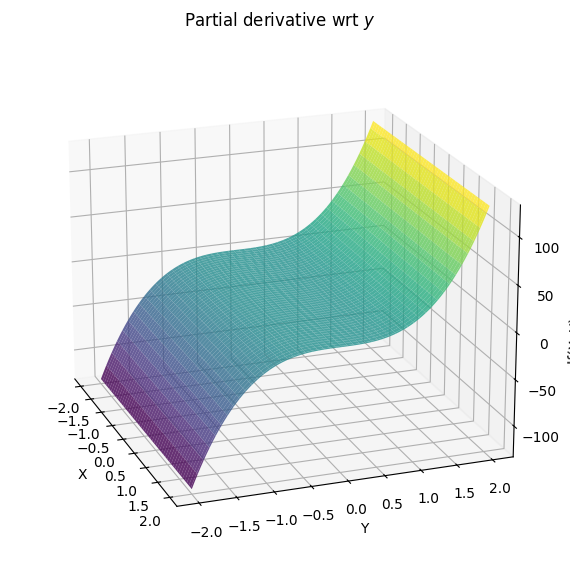

In [59]:
# Create the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Zgrad.squeeze()[1], cmap='viridis', alpha=0.8)

# Set labels
ax.set_title('Partial derivative wrt $y$')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('df(X, Y)')

ax.view_init(20,-20)
plt.show()

In [60]:
pars_est, f_history = grad_descent_with_momentum(
    pars_init, 
    f, 
    grad_f, 
    a = 100,
    b = 4,
    momentum=0., 
    nesterov=False, 
    learning_rate=0.001,
    num_iterations=20000, 
    tol=1e-4, 
    print_every=1000
)

Iteration: 1000, pars: (0.03523517418121241, 0.1738557541247803), f(x,y): 0.0038085381328745306.
0.08600540903189903
Iteration: 2000, pars: (0.024954188577472156, 0.12393891632018761), f(x,y): 0.0009826004273526985.
0.03111158605227039
Iteration: 3000, pars: (0.020386427062082504, 0.1014770197893252), f(x,y): 0.00044143394091978016.
0.017067965396566007
Iteration: 4000, pars: (0.01766030763880372, 0.08800519706191459), f(x,y): 0.00024966213221588326.
0.011129951074678434
Iteration: 5000, pars: (0.015798697897563923, 0.0787811252651856), f(x,y): 0.00016031082469886366.
0.007983045101455323
Iteration: 6000, pars: (0.014423936942344435, 0.07195796998873831), f(x,y): 0.0001115731202730729.
0.006082674326615386
Iteration: 7000, pars: (0.013355158329544804, 0.0666473677301002), f(x,y): 8.210213216535214e-05.
0.004832538102937178
Iteration: 8000, pars: (0.012493452104412738, 0.062362089333282834), f(x,y): 6.293451787555521e-05.
0.003958809178459703
Iteration: 9000, pars: (0.011779567354267034

C:\Users\lucas\AppData\Local\Temp\ipykernel_28356\1276685049.py:32: UserWarning: Algorithm did not converge. Returning estimates of last update.
  warnings.warn('Algorithm did not converge. Returning estimates of last update.')


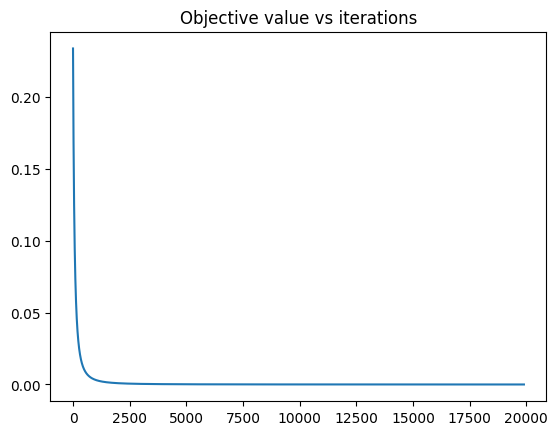

In [61]:
plt.figure()
plt.plot(f_history[100:])
plt.title('Objective value vs iterations')
plt.show()

In [62]:
pars_est, f_history = grad_descent_with_momentum(
    pars_init, 
    f, 
    grad_f, 
    a = 100,
    b = 4,
    momentum=0.9, 
    nesterov=False, 
    learning_rate=0.001,
    num_iterations=20000, 
    tol=1e-4, 
    print_every=1000
)

Iteration: 1000, pars: (-0.011196223984620914, -0.03355295629169775), f(x,y): 6.641108869823242e-06.
0.0008257201281008769
Iteration: 2000, pars: (-0.007891281808801123, -0.028751835382600087), f(x,y): 3.121304470082228e-06.
0.00042829002023384493
Iteration: 3000, pars: (-0.006440863082258546, -0.025559194528877702), f(x,y): 1.879157621363459e-06.
0.00028783788905504425
Iteration: 4000, pars: (-0.00557813080413534, -0.023239312904831375), f(x,y): 1.2635013902607644e-06.
0.00021253265275028905
Iteration: 5000, pars: (-0.004989792128796324, -0.02145528601127712), f(x,y): 9.096034170699077e-07.
0.00016569140823712096
Iteration: 6000, pars: (-0.0045555994893309425, -0.02002810809880821), f(x,y): 6.866761494329214e-07.
0.00013401463217480592
Iteration: 7000, pars: (-0.004218159639220282, -0.018852692354571973), f(x,y): 5.369635296643742e-07.
0.00011135452912339444
Converged after 7642 iterations


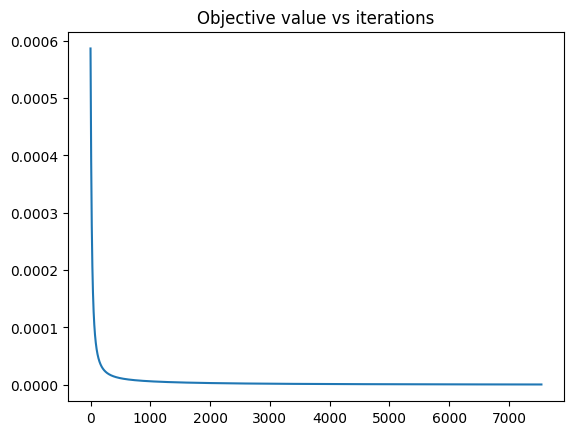

In [63]:
plt.figure()
plt.plot(f_history[100:])
plt.title('Objective value vs iterations')
plt.show()

In [64]:
def grad_descent_with_momentum_with_history(pars_init, f, df, a=10, b=2, momentum=0.9, nesterov=False, learning_rate=0.01,
                               num_iterations=10000, tol=1e-4, print_every=100):
    pars = np.reshape(pars_init, (-1,1))
    velocity = np.zeros_like(pars)
    fx_history = []
    pars_history = [pars_init.copy()]  # Store the initial parameters

    for i in range(num_iterations):
        x = pars[0,0]
        y = pars[1,0]
        if nesterov:
            lookahead_ = pars + momentum * velocity
            lx = lookahead_[0,0]
            ly = lookahead_[1,0]
            gradient = df(lx, ly, a, b)
        else:
            gradient = df(x, y, a, b)
        
        # Update velocity and parameters
        velocity = momentum * velocity - learning_rate * gradient
        pars += velocity

        fx_history.append(f(pars[0,0], pars[1,0], a, b))
        pars_history.append(pars.copy().flatten())  # Store current parameters
        
        if (i+1) % print_every == 0:
            print(f'Iteration: {i+1}, pars: ({pars[0,0]}, {pars[1,0]}), f(x,y): {f(pars[0,0],pars[1,0], a, b)}.')
            print(np.linalg.norm(gradient))
        
        if np.linalg.norm(gradient) <= tol:
            print(f"Converged after {i + 1} iterations")
            break
        
        if (i+1) == num_iterations:
            warnings.warn('Algorithm did not converge. Returning estimates of last update.')
    
    return pars, fx_history, pars_history

In [65]:
# Initial parameters
pars_init = np.array([1., 1.])

# Run gradient descent with momentum
final_pars, fx_history, pars_history = grad_descent_with_momentum_with_history(
    pars_init, f, grad_f, a=100, b=4, 
    momentum=0.9, learning_rate=0.001, 
    num_iterations=20000, tol=1e-4, print_every=1000
)

# Convert parameter history to arrays for plotting
pars_history = np.array(pars_history)
x_updates = pars_history[:, 0]
y_updates = pars_history[:, 1]

Iteration: 1000, pars: (-0.011196223984620914, -0.03355295629169775), f(x,y): 6.641108869823242e-06.
0.0008257201281008769
Iteration: 2000, pars: (-0.007891281808801123, -0.028751835382600087), f(x,y): 3.121304470082228e-06.
0.00042829002023384493
Iteration: 3000, pars: (-0.006440863082258546, -0.025559194528877702), f(x,y): 1.879157621363459e-06.
0.00028783788905504425
Iteration: 4000, pars: (-0.00557813080413534, -0.023239312904831375), f(x,y): 1.2635013902607644e-06.
0.00021253265275028905
Iteration: 5000, pars: (-0.004989792128796324, -0.02145528601127712), f(x,y): 9.096034170699077e-07.
0.00016569140823712096
Iteration: 6000, pars: (-0.0045555994893309425, -0.02002810809880821), f(x,y): 6.866761494329214e-07.
0.00013401463217480592
Iteration: 7000, pars: (-0.004218159639220282, -0.018852692354571973), f(x,y): 5.369635296643742e-07.
0.00011135452912339444
Converged after 7642 iterations


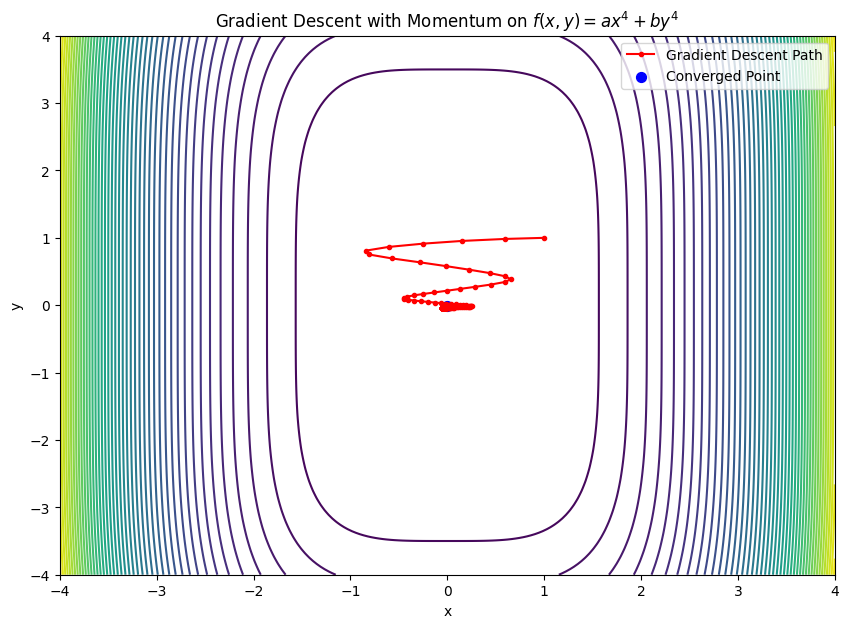

In [66]:
x = np.linspace(-4, 4, 200)
y = np.linspace(-4, 4, 200)
X, Y = np.meshgrid(x, y)
Z = f(X, Y, a=100, b=4)

# Plot the 2D contour plot with parameter updates
plt.figure(figsize=(10, 7))
plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.plot(x_updates, y_updates, marker='o', color='red', markersize=3, label='Gradient Descent Path')
plt.scatter(x_updates[-1], y_updates[-1], color='blue', s=50, label='Converged Point')
plt.title('Gradient Descent with Momentum on $f(x, y) = ax^4 + by^4$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [67]:
# Initial parameters
pars_init = np.array([1., 1.])

# Run gradient descent with momentum
final_pars, fx_history, pars_history = grad_descent_with_momentum_with_history(
    pars_init, f, grad_f, a=100, b=4, 
    momentum=0.9, learning_rate=0.002, 
    num_iterations=20000, tol=1e-4, print_every=1000
)

# Convert parameter history to arrays for plotting
pars_history = np.array(pars_history)
x_updates = pars_history[:, 0]
y_updates = pars_history[:, 1]

Converged after 16 iterations


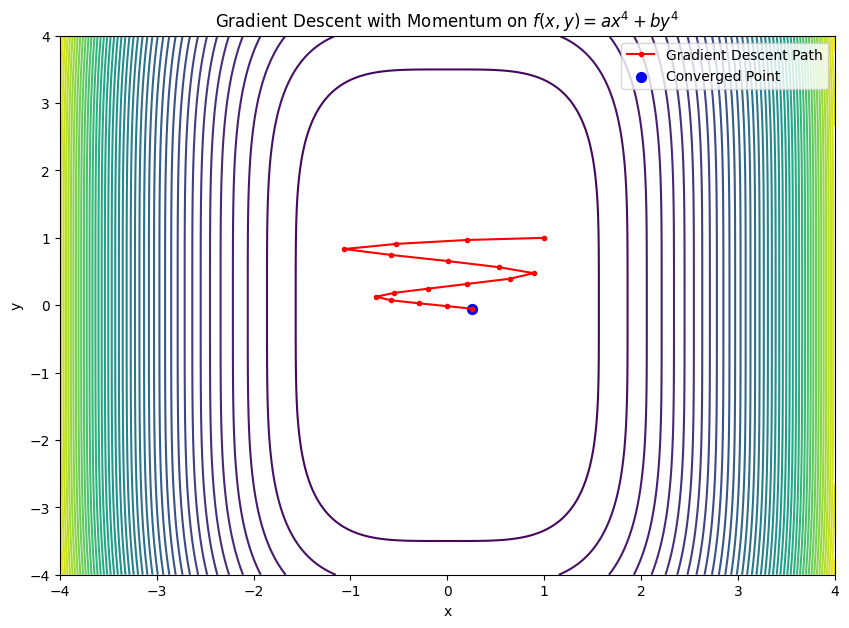

In [68]:
X, Y = np.meshgrid(x, y)
Z = f(X, Y, a=100, b=4)

# Plot the 2D contour plot with parameter updates
plt.figure(figsize=(10, 7))
plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.plot(x_updates, y_updates, marker='o', color='red', markersize=3, label='Gradient Descent Path')
plt.scatter(x_updates[-1], y_updates[-1], color='blue', s=50, label='Converged Point')
plt.title('Gradient Descent with Momentum on $f(x, y) = ax^4 + by^4$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Note how difficult it is if we change the starting values

In [72]:
# Initial parameters
pars_init = np.array([2.5, 3.5])

# Run gradient descent with momentum
final_pars, fx_history, pars_history = grad_descent_with_momentum_with_history(
    pars_init, f, grad_f, a=100, b=4, 
    momentum=0., learning_rate=0.0001, 
    num_iterations=20000, tol=1e-4, print_every=1000
)

# Convert parameter history to arrays for plotting
pars_history = np.array(pars_history)
x_updates = pars_history[:, 0]
y_updates = pars_history[:, 1]

Iteration: 1000, pars: (0.11141994563880547, 0.551272313621104), f(x,y): 0.38483541272929483.
2.741026718425099
Iteration: 2000, pars: (0.07891084494600814, 0.3924685806167266), f(x,y): 0.09878037396771076.
0.9877395867615104
Iteration: 3000, pars: (0.06446687331874659, 0.32119429588445947), f(x,y): 0.04429992422073968.
0.5411712457671529
Iteration: 4000, pars: (0.05584636107737236, 0.2784897187062131), f(x,y): 0.025032758655750432.
0.352663320142204
Iteration: 5000, pars: (0.049959557831448835, 0.24926610311191463), f(x,y): 0.01606531244858475.
0.2528502195749246
Iteration: 6000, pars: (0.045612256448598475, 0.22765646021260538), f(x,y): 0.011177182892682484.
0.19260792514855446
Iteration: 7000, pars: (0.042232530620791416, 0.21084119968921763), f(x,y): 0.008222754680106845.
0.15299331814301853
Iteration: 8000, pars: (0.03950761040903729, 0.1972748210420835), f(x,y): 0.006301867758035063.
0.12531407511435136
Iteration: 9000, pars: (0.03725013354506239, 0.18602998410599922), f(x,y): 0.

C:\Users\lucas\AppData\Local\Temp\ipykernel_28356\784370750.py:35: UserWarning: Algorithm did not converge. Returning estimates of last update.
  warnings.warn('Algorithm did not converge. Returning estimates of last update.')


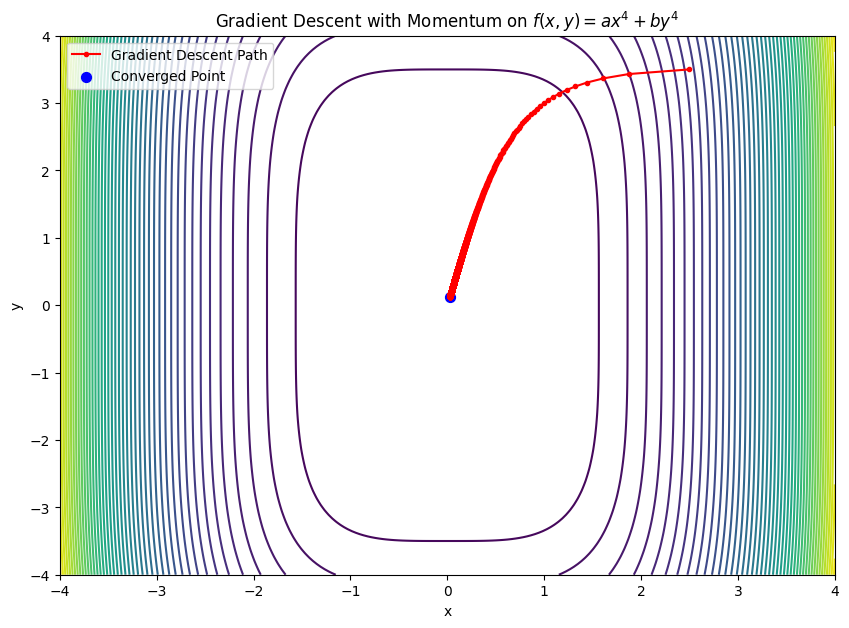

In [73]:
X, Y = np.meshgrid(x, y)
Z = f(X, Y, a=100, b=4)

# Plot the 2D contour plot with parameter updates
plt.figure(figsize=(10, 7))
plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.plot(x_updates, y_updates, marker='o', color='red', markersize=3, label='Gradient Descent Path')
plt.scatter(x_updates[-1], y_updates[-1], color='blue', s=50, label='Converged Point')
plt.title('Gradient Descent with Momentum on $f(x, y) = ax^4 + by^4$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [74]:
# Initial parameters
pars_init = np.array([2.5, 3.5])

# Run gradient descent with momentum
final_pars, fx_history, pars_history = grad_descent_with_momentum_with_history(
    pars_init, f, grad_f, a=100, b=4, 
    momentum=0.9, learning_rate=0.0001, 
    num_iterations=20000, tol=1e-4, print_every=1000
)

# Convert parameter history to arrays for plotting
pars_history = np.array(pars_history)
x_updates = pars_history[:, 0]
y_updates = pars_history[:, 1]

Iteration: 1000, pars: (0.031628536051652174, -0.16621510494599634), f(x,y): 0.003153179301851443.
0.07465566507676039
Iteration: 2000, pars: (0.023527902869575006, -0.12083203304162492), f(x,y): 0.0008833275214010808.
0.028724055846518177
Iteration: 3000, pars: (0.019571318178220554, -0.09966735032858681), f(x,y): 0.00040937579947196407.
0.01612988936114526
Iteration: 4000, pars: (0.01711517369655736, -0.08677764566443535), f(x,y): 0.0002354060239929702.
0.010649916404923796
Iteration: 5000, pars: (0.01540063781735362, -0.07787467306411959), f(x,y): 0.00015273634703400374.
0.007698498546750869
Iteration: 6000, pars: (0.014116457396647407, -0.07125131332600937), f(x,y): 0.00010706457549399179.
0.005897408114738204
Iteration: 7000, pars: (0.01310817253047953, -0.06607530262575984), f(x,y): 7.919827965227421e-05.
0.004703787703291082
Iteration: 8000, pars: (0.01228926239064527, -0.061885954027475015), f(x,y): 6.095254124339102e-05.
0.0038649408720003906
Iteration: 9000, pars: (0.01160698

C:\Users\lucas\AppData\Local\Temp\ipykernel_28356\784370750.py:35: UserWarning: Algorithm did not converge. Returning estimates of last update.
  warnings.warn('Algorithm did not converge. Returning estimates of last update.')


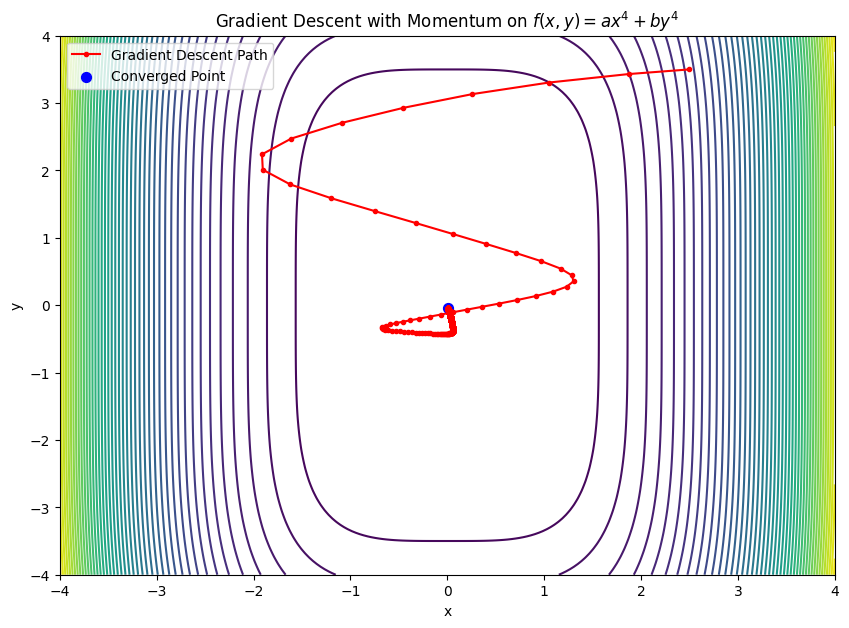

In [75]:
X, Y = np.meshgrid(x, y)
Z = f(X, Y, a=100, b=4)

# Plot the 2D contour plot with parameter updates
plt.figure(figsize=(10, 7))
plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.plot(x_updates, y_updates, marker='o', color='red', markersize=3, label='Gradient Descent Path')
plt.scatter(x_updates[-1], y_updates[-1], color='blue', s=50, label='Converged Point')
plt.title('Gradient Descent with Momentum on $f(x, y) = ax^4 + by^4$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [76]:
# Initial parameters
pars_init = np.array([2.5, 3.5])

# Run gradient descent with momentum
final_pars, fx_history, pars_history = grad_descent_with_momentum_with_history(
    pars_init, f, grad_f, a=100, b=4, 
    momentum=0.99, learning_rate=0.0001, 
    num_iterations=20000, tol=1e-4, print_every=1000
)

# Convert parameter history to arrays for plotting
pars_history = np.array(pars_history)
x_updates = pars_history[:, 0]
y_updates = pars_history[:, 1]

Iteration: 1000, pars: (0.09026689610526883, -0.10250541309199919), f(x,y): 0.007080792216761851.
0.2953972028487125
Iteration: 2000, pars: (-0.010614250152496823, -0.04718930522607984), f(x,y): 2.1104376322823702e-05.
0.0017503289936842878
Iteration: 3000, pars: (-0.007417560915165572, -0.03528361011335729), f(x,y): 6.502156468564701e-06.
0.0007219870823200818
Iteration: 4000, pars: (-0.006121257410395862, -0.02959372922382623), f(x,y): 3.208422687875991e-06.
0.00042490100349666643
Iteration: 5000, pars: (-0.00534229600344716, -0.026038349491264084), f(x,y): 1.920166256943601e-06.
0.00028906897094042866
Iteration: 6000, pars: (-0.004805356947799621, -0.0235367975955624), f(x,y): 1.280900620251146e-06.
0.00021335068539997114
Iteration: 7000, pars: (-0.0044055336776107415, -0.021650011845199487), f(x,y): 9.164749195941359e-07.
0.00016596728658449213
Iteration: 8000, pars: (-0.004092518244359074, -0.020159791327190937), f(x,y): 6.887516313236619e-07.
0.00013395576969202103
Iteration: 900

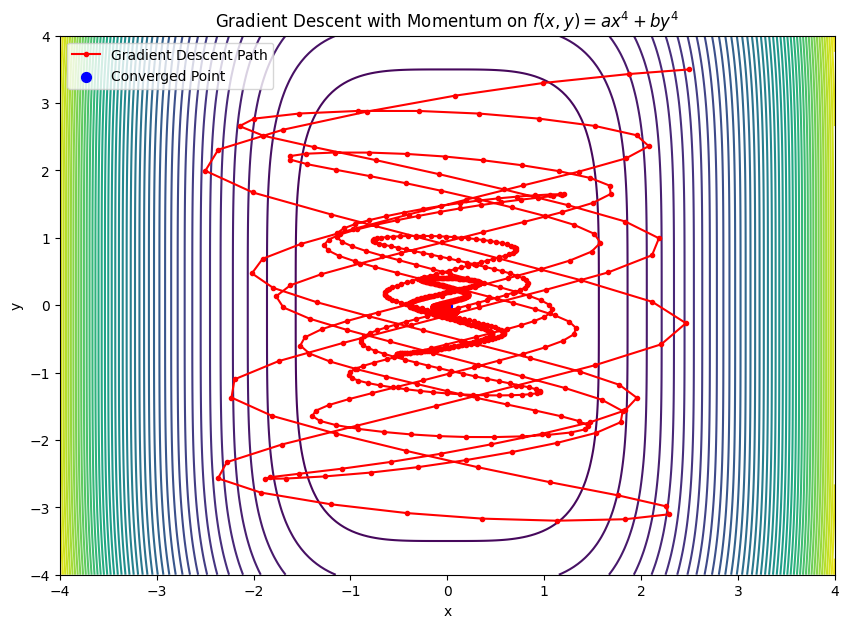

In [77]:
X, Y = np.meshgrid(x, y)
Z = f(X, Y, a=100, b=4)

# Plot the 2D contour plot with parameter updates
plt.figure(figsize=(10, 7))
plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.plot(x_updates, y_updates, marker='o', color='red', markersize=3, label='Gradient Descent Path')
plt.scatter(x_updates[-1], y_updates[-1], color='blue', s=50, label='Converged Point')
plt.title('Gradient Descent with Momentum on $f(x, y) = ax^4 + by^4$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [84]:
# Initial parameters
pars_init = np.array([2.5, 3.5])

# Run gradient descent with momentum
final_pars, fx_history, pars_history = grad_descent_with_momentum_with_history(
    pars_init, f, grad_f, a=100, b=4, 
    momentum=0.99, learning_rate=0.00008, 
    num_iterations=20000, tol=1e-4, print_every=1000
)

# Convert parameter history to arrays for plotting
pars_history = np.array(pars_history)
x_updates = pars_history[:, 0]
y_updates = pars_history[:, 1]

Iteration: 1000, pars: (0.004139865244551429, 0.035166469065531294), f(x,y): 6.14688786094682e-06.
0.0006829647433887082
Iteration: 2000, pars: (0.0037406865979136136, 0.0433529541089084), f(x,y): 1.4149339348745284e-05.
0.0013048888576188892
Iteration: 3000, pars: (0.003565451313016162, 0.035225012832085796), f(x,y): 6.174514358548854e-06.
0.0006999025637006231
Iteration: 4000, pars: (0.0034271455665818564, 0.03051677024171112), f(x,y): 3.4828748537664584e-06.
0.0004551652671955888
Iteration: 5000, pars: (0.00330388495739426, 0.027330794983885427), f(x,y): 2.2437859474372795e-06.
0.0003270605525274459
Iteration: 6000, pars: (0.003193115234404728, 0.02498495342469206), f(x,y): 1.5691375616105184e-06.
0.0002499497855744057
Iteration: 7000, pars: (0.003092852733740945, 0.023162367559833738), f(x,y): 1.1604590375328946e-06.
0.00019921773774787192
Iteration: 8000, pars: (0.00300152954130255, 0.021692366746963374), f(x,y): 8.938187749207315e-07.
0.00016370839788540023
Iteration: 9000, pars:

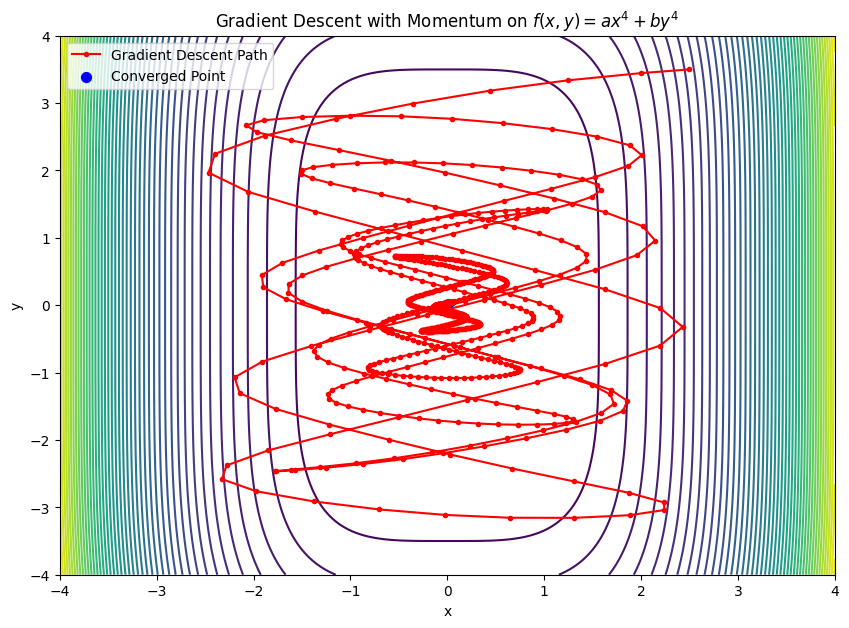

In [85]:
X, Y = np.meshgrid(x, y)
Z = f(X, Y, a=100, b=4)

# Plot the 2D contour plot with parameter updates
plt.figure(figsize=(10, 7))
plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.plot(x_updates, y_updates, marker='o', color='red', markersize=3, label='Gradient Descent Path')
plt.scatter(x_updates[-1], y_updates[-1], color='blue', s=50, label='Converged Point')
plt.title('Gradient Descent with Momentum on $f(x, y) = ax^4 + by^4$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [90]:
# Initial parameters
pars_init = np.array([2.5, 3.5])

# Run gradient descent with momentum
final_pars, fx_history, pars_history = grad_descent_with_momentum_with_history(
    pars_init, f, grad_f, a=100, b=4, 
    momentum=0.99, nesterov=True, learning_rate=0.0001, 
    num_iterations=100000, tol=1e-4, print_every=1000
)

# Convert parameter history to arrays for plotting
pars_history = np.array(pars_history)
x_updates = pars_history[:, 0]
y_updates = pars_history[:, 1]

Converged after 856 iterations


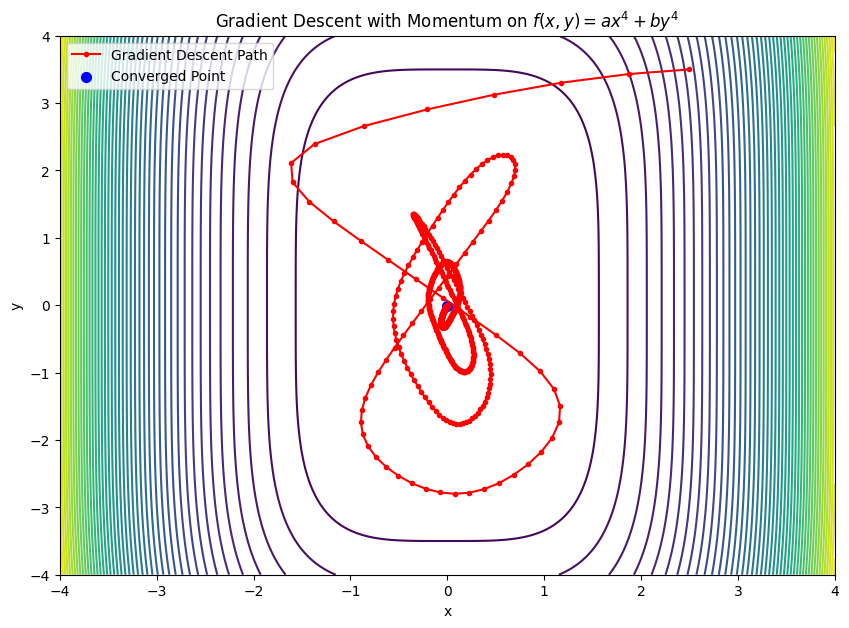

In [91]:
X, Y = np.meshgrid(x, y)
Z = f(X, Y, a=100, b=4)

# Plot the 2D contour plot with parameter updates
plt.figure(figsize=(10, 7))
plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.plot(x_updates, y_updates, marker='o', color='red', markersize=3, label='Gradient Descent Path')
plt.scatter(x_updates[-1], y_updates[-1], color='blue', s=50, label='Converged Point')
plt.title('Gradient Descent with Momentum on $f(x, y) = ax^4 + by^4$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [92]:
# Initial parameters
pars_init = np.array([2.5, 3.5])

# Run gradient descent with momentum
final_pars, fx_history, pars_history = grad_descent_with_momentum_with_history(
    pars_init, f, grad_f, a=100, b=4, 
    momentum=0.99, nesterov=True, learning_rate=0.00005, 
    num_iterations=100000, tol=1e-4, print_every=1000
)

# Convert parameter history to arrays for plotting
pars_history = np.array(pars_history)
x_updates = pars_history[:, 0]
y_updates = pars_history[:, 1]

Iteration: 1000, pars: (-0.028028131858593642, 0.12314097793970132), f(x,y): 0.0009814642378487561.
0.031148643117630503
Iteration: 2000, pars: (-0.01295233134282692, 0.05719907361324593), f(x,y): 4.5631412681088376e-05.
0.0031178674467265575
Iteration: 3000, pars: (-0.00982724223110903, 0.045748878461108096), f(x,y): 1.8454591317007674e-05.
0.0015783511360913122
Iteration: 4000, pars: (-0.008282456565936474, 0.03935890820663462), f(x,y): 1.0069719867148983e-05.
0.0010016756005393349
Iteration: 5000, pars: (-0.0073056443304440315, 0.03510886388600565), f(x,y): 6.3623915037936695e-06.
0.0007097718184992784
Iteration: 6000, pars: (-0.0066139317333459785, 0.03201155770212849), f(x,y): 4.391721415204126e-06.
0.0005374649392769493
Iteration: 7000, pars: (-0.006090083206700838, 0.02962162394820656), f(x,y): 3.2171682972787877e-06.
0.000425562012582659
Iteration: 8000, pars: (-0.005675169672368674, 0.027703534941836513), f(x,y): 2.459870742119712e-06.
0.00034796174419854067
Iteration: 9000, p

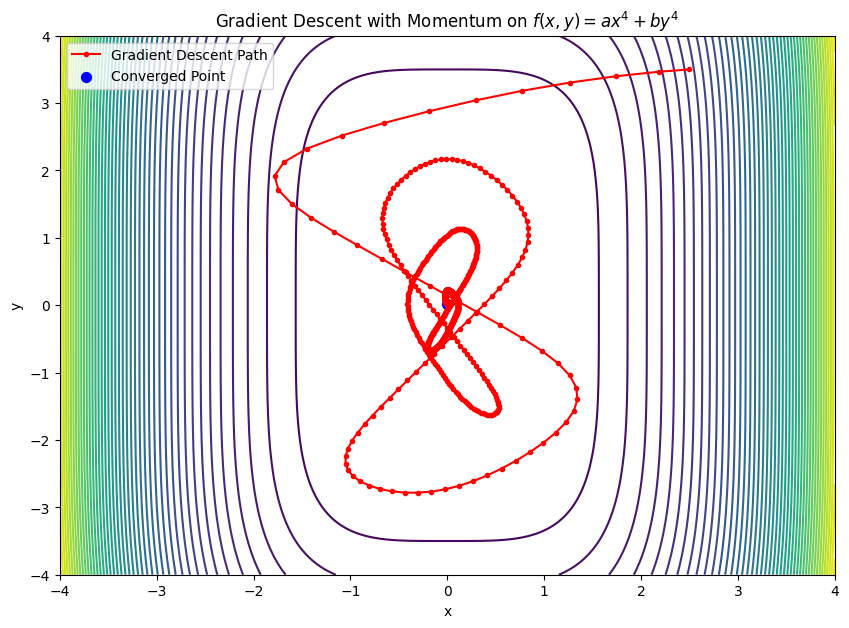

In [93]:
X, Y = np.meshgrid(x, y)
Z = f(X, Y, a=100, b=4)

# Plot the 2D contour plot with parameter updates
plt.figure(figsize=(10, 7))
plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.plot(x_updates, y_updates, marker='o', color='red', markersize=3, label='Gradient Descent Path')
plt.scatter(x_updates[-1], y_updates[-1], color='blue', s=50, label='Converged Point')
plt.title('Gradient Descent with Momentum on $f(x, y) = ax^4 + by^4$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()